 # TP2: Analyse en composantes principals et reconstruction

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from time import perf_counter

In [2]:
def plot_gallery(images):
  #Affiche les 12 premières images contenues dans images
  #images est de taille Nb image*Ny*Nx

  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.show() 

In [3]:
#Load the data
[X, y, name]=np.load("TP1.npy",allow_pickle=True)
#plot_gallery(X)

## **1. Mise en forme des données:**

In [4]:
#Partitionnement de la base de donnée:
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)

# Prétraitement des données
# 1. Redimensionnement des données
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [5]:
# Verification des dimensions
x_train.shape
x_test.shape

(322, 2914)

In [6]:
# 2. Mise en forme
scaler = StandardScaler()

# calcul de la moyenne et std sur x_train
scaler.fit(x_train)

# Changement de repere par rapport à la moyenne de x_train (pour avoir la meme base)
# soustraire la moyenne et diviser par l'ecart type
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## **2. Analyse en composantes principales et Classification:**

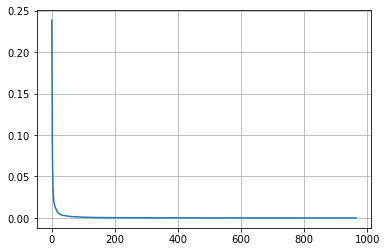

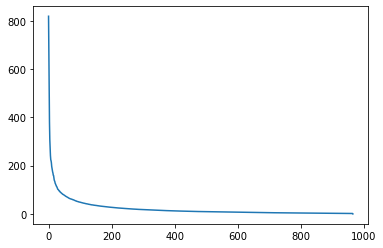

In [7]:
# Decomposition en composantes principales
# PCA avec Max n= 966
mypca = PCA(n_components=x_train.shape[0]) # On paramètre ici pour ne garder que 966 composantes

# Modèle d'ACP
mypca.fit(x_train)
var = mypca.explained_variance_ratio_
#print(mypca.explained_variance_ratio_)  
#print(mypca.singular_values_)
#print(mypca.components_)

# Résultats de l'ACP
data= mypca.fit_transform(x_train)
plt.figure()
plt.plot(np.arange(len(var)),var)
plt.grid()
plt.figure()
plt.plot(mypca.singular_values_)

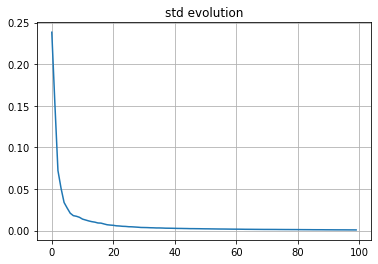

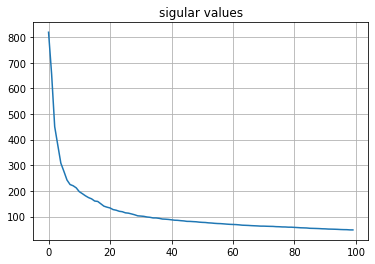

In [8]:
# Decomposition en composantes principales
# PCA avec Max n= 100
mypca = PCA(n_components=100) # On paramètre ici pour ne garder que 100 composantes

# Modèle d'ACP
mypca.fit(x_train)
var = mypca.explained_variance_ratio_
#print(mypca.explained_variance_ratio_)  
#print(mypca.singular_values_)
#print(mypca.components_)

# Résultats de l'ACP
x_train1= mypca.fit_transform(x_train)
x_test1= mypca.transform(x_test)
plt.figure()
plt.plot(np.arange(len(var)),var)
plt.title('std evolution')
plt.grid()

plt.figure()
plt.plot(mypca.singular_values_)
plt.title('sigular values')
plt.grid()


In [9]:
# Classification des données de base
classifieur5PPV = KNN(n_neighbors=5, p=1)
tps1 = perf_counter() 
classifieur5PPV.fit(x_train, y_train)
tps2 = perf_counter() 
print("Durée de classification : ",tps2 - tps1)
score = classifieur5PPV.score(x_test, y_test)
print(f'Score = {score*100} %')

Durée de classification :  0.45940619999998944
Score = 66.45962732919256 %


In [10]:
# Classification des données PC1
classifieur5PPV_PCA100 = KNN(n_neighbors=5, p=1)
tps1 = perf_counter() 
classifieur5PPV_PCA100.fit(x_train1, y_train)
tps2 = perf_counter() 
print("Durée de classification : ",tps2 - tps1)
score = classifieur5PPV_PCA100.score(x_test1, y_test)
print(f'Score = {score*100} %')


Durée de classification :  0.0221587999999997
Score = 70.1863354037267 %


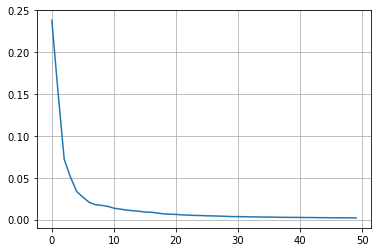

In [11]:
# Decomposition en composantes principales
# PCA avec Max n= 50
mypca = PCA(n_components=50) # On paramètre ici pour ne garder que 50 composantes
# Modèle d'ACP
mypca.fit(x_train)
var = mypca.explained_variance_ratio_
#print(mypca.explained_variance_ratio_)  
#print(mypca.singular_values_)
#print(mypca.components_)

# Résultats de l'ACP
x_train2= mypca.fit_transform(x_train)
x_test2= mypca.transform(x_test)
plt.figure()
plt.plot(np.arange(len(var)),var)
plt.grid()

In [12]:
# Classification des données PC1
classifieur5PPV_PCA50 = KNN(n_neighbors=5, p=1)
tps1 = perf_counter() 
classifieur5PPV_PCA50.fit(x_train2, y_train)
tps2 = perf_counter() 
print("Durée de classification : ",tps2 - tps1)
score = classifieur5PPV_PCA50.score(x_test2, y_test)
print(f'Score = {score*100} %')

Durée de classification :  0.012933500000002596
Score = 71.11801242236024 %


## **3. Analyse en composantes principales et reconstruction:**


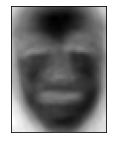

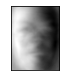

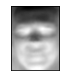

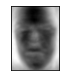

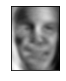

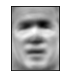

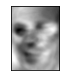

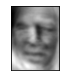

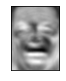

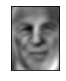

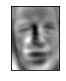

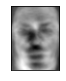

(50, 62, 47)

In [13]:
#2.
vecteur_propre = mypca.components_
vecteur_propre = np.reshape(vecteur_propre,(50,X.shape[1],X.shape[2]))
plot_gallery(vecteur_propre)
vecteur_propre.shape


Image reconstruite : 



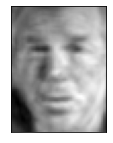

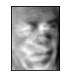

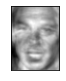

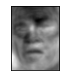

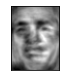

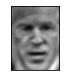

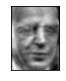

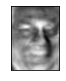

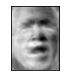

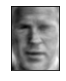

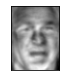

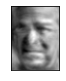

Image originale : 



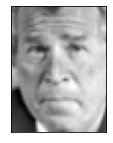

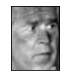

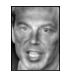

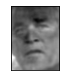

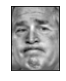

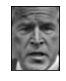

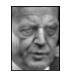

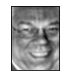

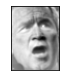

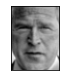

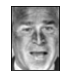

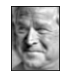

In [14]:
#3.
# Decomposition en composantes principales
# PCA avec Max n= 50
mypca = PCA(n_components=50) # On paramètre ici pour ne garder que 50 composantes
# Modèle d'ACP
mypca.fit(x_test)
x_testC = mypca.fit_transform(x_test)
x_testR = mypca.inverse_transform(x_testC)
x_testR.shape
x_testR = np.reshape(x_testR,(322,62,47))
x_test_im = np.reshape(x_test,(x_test.shape[0],X.shape[1],X.shape[2]))
print("Image reconstruite : \n")
plot_gallery(x_testR)
print("Image originale : \n")
plot_gallery(x_test_im)


In [15]:
# COmparer les images
E = (x_testR - x_test_im)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print("Moyenne : ",E)


Moyenne :  6.2537513


In [16]:
print( f'Dimensions des images originales {x_test_im.shape}.\nDimensions des images testC {x_testC.shape}.\nDimensions des images reconstruites {x_testR.shape}.')
print(f"Taux de compression : {(x_test_im.shape[1]*x_test_im.shape[2])/x_testC.shape[1]}")

Dimensions des images originales (322, 62, 47).
Dimensions des images testC (322, 50).
Dimensions des images reconstruites (322, 62, 47).
Taux de compression : 58.28


Erreur Moyenne : 18.144668579101562		 k = 10
Erreur Moyenne : 11.058690071105957		 k = 60
Erreur Moyenne : 8.383021354675293		 k = 110
Erreur Moyenne : 6.720400333404541		 k = 160
Erreur Moyenne : 5.52851676940918		 k = 210
Erreur Moyenne : 4.61808967590332		 k = 260
Erreur Moyenne : 3.8990347385406494		 k = 310
Erreur Moyenne : 3.3147289752960205		 k = 360
Erreur Moyenne : 2.828209161758423		 k = 410
Erreur Moyenne : 2.4166905879974365		 k = 460
Erreur Moyenne : 2.0601468086242676		 k = 510
Erreur Moyenne : 1.7519052028656006		 k = 560
Erreur Moyenne : 1.4806694984436035		 k = 610
Erreur Moyenne : 1.2394806146621704		 k = 660
Erreur Moyenne : 1.0246027708053589		 k = 710
Erreur Moyenne : 0.8278223872184753		 k = 760
Erreur Moyenne : 0.6393893361091614		 k = 810
Erreur Moyenne : 0.46855100989341736		 k = 860
Erreur Moyenne : 0.29668158292770386		 k = 910


<function matplotlib.pyplot.show(*args, **kw)>

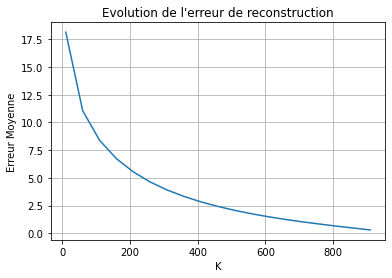

In [17]:
#6. Evaluer l'erreur de reconstruction
tab_erreur = []
tabk = []
for k in range(10,960,50):
    mypca = PCA(n_components=k) 
    mypca.fit(x_train)
    x_trainC = mypca.fit_transform(x_train)
    x_trainR = mypca.inverse_transform(x_trainC)


    # COmparer les images
    E = (x_trainR - x_train)**2
    E = np.mean(np.sqrt(np.sum(E,axis=0)))
    tabk.append(k)
    tab_erreur.append(E)
    print(f"Erreur Moyenne : {E}\t\t k = {k}")


plt.figure()
plt.plot(tabk,tab_erreur)
plt.title("Evolution de l'erreur de reconstruction")
plt.xlabel('K')
plt.ylabel('Erreur Moyenne')
plt.grid()
plt.show


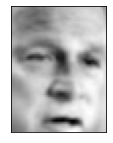

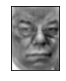

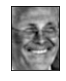

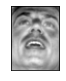

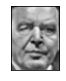

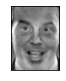

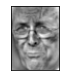

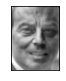

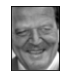

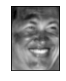

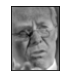

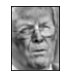

In [18]:
# COmparaison des images reconstruite à partir de 966
x_trainR = np.reshape(x_trainR,(966,62,47))
plot_gallery(x_trainR)
